/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.3041 - loss: 2.7533 - val_accuracy: 0.4167 - val_loss: 2.3879
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3093 - loss: 2.5850 - val_accuracy: 0.4167 - val_loss: 2.2537
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3520 - loss: 2.3042 - val_accuracy: 0.4167 - val_loss: 2.1260
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2832 - loss: 2.3860 - val_accuracy: 0.4167 - val_loss: 2.0042
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3134 - loss: 2.1588 - val_accuracy: 0.4167 - val_loss: 1.8908
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3447 - loss: 1.9666 - val_accuracy: 0.4167 - val_loss: 1.7843
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2843 - loss: 1.9881 - val_accuracy: 0.4167 - val_loss: 1.6851
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3280 - loss: 1.7553 - val_accuracy: 0.4167 - val_loss:

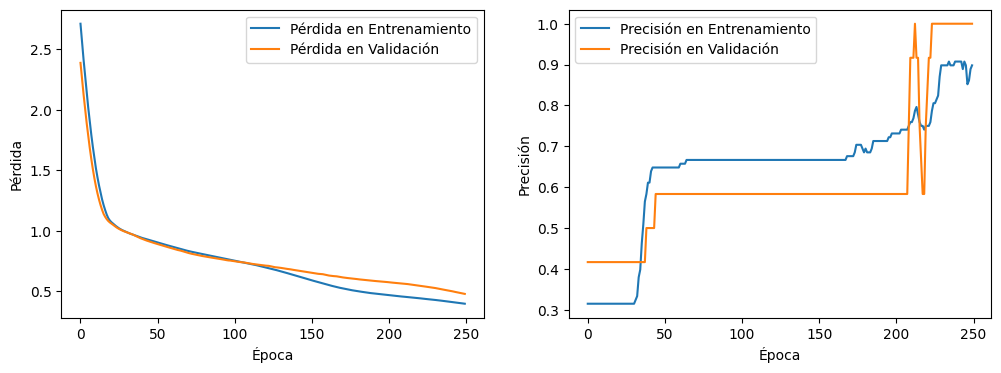

In [1]:
# Importar las librerías necesarias
# Para dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Para codificar las etiquetas en formato one-hot
from tensorflow.keras.utils import to_categorical
# Para crear un modelo secuencial de red neuronal
from tensorflow.keras.models import Sequential
# Para añadir capas densas (completamente conectadas)
from tensorflow.keras.layers import Dense
# Para visualizar gráficos
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris desde scikit-learn
iris = load_iris()
X = iris.data  # Características
Y = iris.target  # Etiquetas

# Convertir las etiquetas a codificación one-hot
Y_one_hot = to_categorical(Y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_one_hot, test_size=0.2, random_state=42)

# Definir la arquitectura de la red neuronal
model = Sequential()
# Primera capa oculta: 6 neuronas, función de activación ReLU
model.add(Dense(6, input_dim=4, activation='relu', name="hidden1_layer"))
# Segunda capa oculta: 5 neuronas, función de activación ReLU
model.add(Dense(5, activation='relu', name="hidden2_layer"))
# Tercera capa oculta: 4 neuronas, función de activación ReLU
model.add(Dense(4, activation='relu', name="hidden3_layer"))
# Capa de salida: 3 neuronas (una por clase), función softmax
model.add(Dense(3, activation='softmax', name="output_layer"))

# Compilar el modelo
# Especificamos la función de pérdida (categorical_crossentropy para clasificación multiclase),
# el optimizador (adam) y la métrica a monitorear (precisión).
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
# Reservamos un 10% de los datos de entrenamiento para validación.
history = model.fit(X_train, Y_train, batch_size=32, epochs=250, verbose=1, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba con datos no vistos
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Visualizar la evolución del entrenamiento
# Graficamos la pérdida y la precisión durante el entrenamiento para detectar problemas como el sobreajuste.
def plot_history(historial):
    plt.figure(figsize=(12, 4))

    # Gráfica de la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(historial.history['loss'],
             label='Pérdida en Entrenamiento')
    plt.plot(historial.history['val_loss'],
             label='Pérdida en Validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    # Gráfica de la precisión
    plt.subplot(1, 2, 2)
    plt.plot(historial.history['accuracy'],
             label='Precisión en Entrenamiento')
    plt.plot(historial.history['val_accuracy'],
             label='Precisión en Validación')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.show()

plot_history(history)